In [252]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

clustering_algorithms = ['gaussian_mixture', 'kmeans']
iteration = 10
class_num = ["23", "34"]
conv_types = ["se", "re"]
eval_methods = ['ari', 'nmi', 'purity']
train_num = ['15000', '30000', '45000']

name_column = []

row_name = 'seq2seq'
name_column.append(row_name)
for c_type in conv_types:
    row_name = 'conv_' + c_type
    name_column.append(row_name)

iter_column = [str(x) for x in range(iteration)]
df_ari_gmm_23 = pd.DataFrame(columns=iter_column)
df_ari_gmm_23 = df_ari_gmm_23.assign(name = name_column)
df_ari_gmm_23.set_index('name', inplace=True)
df_ari_km_23 = pd.DataFrame(columns=iter_column)
df_ari_km_23 = df_ari_km_23.assign(name = name_column)
df_ari_km_23.set_index('name', inplace=True)

df_nmi_gmm_23 = pd.DataFrame(columns=iter_column)
df_nmi_gmm_23 = df_ari_gmm_23.assign(name = name_column)
df_nmi_gmm_23.set_index('name', inplace=True)
df_nmi_km_23 = pd.DataFrame(columns=iter_column)
df_nmi_km_23 = df_ari_km_23.assign(name = name_column)
df_nmi_km_23.set_index('name', inplace=True)

df_purity_gmm_23 = pd.DataFrame(columns=iter_column)
df_purity_gmm_23 = df_ari_gmm_23.assign(name = name_column)
df_purity_gmm_23.set_index('name', inplace=True)
df_purity_km_23 = pd.DataFrame(columns=iter_column)
df_purity_km_23 = df_ari_km_23.assign(name = name_column)
df_purity_km_23.set_index('name', inplace=True)

df_ari_gmm_34 = pd.DataFrame(columns=iter_column)
df_ari_gmm_34 = df_ari_gmm_34.assign(name = name_column)
df_ari_gmm_34.set_index('name', inplace=True)
df_ari_km_34 = pd.DataFrame(columns=iter_column)
df_ari_km_34 = df_ari_km_34.assign(name = name_column)
df_ari_km_34.set_index('name', inplace=True)

df_nmi_gmm_34 = pd.DataFrame(columns=iter_column)
df_nmi_gmm_34 = df_ari_gmm_34.assign(name = name_column)
df_nmi_gmm_34.set_index('name', inplace=True)
df_nmi_km_34 = pd.DataFrame(columns=iter_column)
df_nmi_km_34 = df_ari_km_34.assign(name = name_column)
df_nmi_km_34.set_index('name', inplace=True)

df_purity_gmm_34 = pd.DataFrame(columns=iter_column)
df_purity_gmm_34 = df_ari_gmm_34.assign(name = name_column)
df_purity_gmm_34.set_index('name', inplace=True)
df_purity_km_34 = pd.DataFrame(columns=iter_column)
df_purity_km_34 = df_ari_km_34.assign(name = name_column)
df_purity_km_34.set_index('name', inplace=True)


In [253]:
def run(data_name, iter, category, row_name, train_num):    
    lres = []
    for _, eval_method in enumerate(eval_methods):
        csv_path = 'csv_' + train_num + '/' + eval_method + '/' + data_name + ".csv"
        with open(csv_path, 'r') as fd:
            res = fd.read()
        lres = res.split('\n')
        if eval_method == 'purity':
            temp = lres[-2].split('Total,')[-1].split(',')
            if category == '23':
                df_purity_gmm_23.loc[row_name, str(iter)] = float(temp[0].strip('\%'))/100
                df_purity_km_23.loc[row_name, str(iter)] = float(temp[1].strip('\%'))/100
            else:
                df_purity_gmm_34.loc[row_name, str(iter)] = float(temp[0].strip('\%'))/100
                df_purity_km_34.loc[row_name, str(iter)] = float(temp[1].strip('\%'))/100
        elif eval_method == 'nmi':
            temp = lres[-2].split(',')
            if category == '23':
                df_nmi_gmm_23.loc[row_name, str(iter)] = float(temp[0])
                df_nmi_km_23.loc[row_name, str(iter)] = float(temp[1])
            else:
                df_nmi_gmm_34.loc[row_name, str(iter)] = float(temp[0])
                df_nmi_km_34.loc[row_name, str(iter)] = float(temp[1])
        else:
            temp = lres[-2].split(',')
            if category == '23':
                df_ari_gmm_23.loc[row_name, str(iter)] = float(temp[0])
                df_ari_km_23.loc[row_name, str(iter)] = float(temp[1])
            else:
                df_ari_gmm_34.loc[row_name, str(iter)] = float(temp[0])
                df_ari_km_34.loc[row_name, str(iter)] = float(temp[1])


In [254]:
def calculate_mean():
    df_ari_gmm_23['Mean_ag'] = df_ari_gmm_23.mean(axis=1)
    df_ari_gmm_23['Std_ag'] = df_ari_gmm_23.std(axis=1)
    df_ari_km_23['Mean_ak'] = df_ari_km_23.mean(axis=1)
    df_ari_km_23['Std_ak'] = df_ari_km_23.std(axis=1)
    df_nmi_gmm_23['Mean_ng'] = df_nmi_gmm_23.mean(axis=1)
    df_nmi_gmm_23['Std_ng'] = df_nmi_gmm_23.std(axis=1)
    df_nmi_km_23['Mean_nk'] = df_nmi_km_23.mean(axis=1)
    df_nmi_km_23['Std_nk'] = df_nmi_km_23.std(axis=1)
    df_purity_gmm_23['Mean_pg'] = df_purity_gmm_23.mean(axis=1)
    df_purity_gmm_23['Std_pg'] = df_purity_gmm_23.std(axis=1)
    df_purity_km_23['Mean_pk'] = df_purity_km_23.mean(axis=1)
    df_purity_km_23['Std_pk'] = df_purity_km_23.std(axis=1)

    df_ari_gmm_34['Mean_ag'] = df_ari_gmm_34.mean(axis=1)
    df_ari_gmm_34['Std_ag'] = df_ari_gmm_34.std(axis=1)
    df_ari_km_34['Mean_ak'] = df_ari_km_34.mean(axis=1)
    df_ari_km_34['Std_ak'] = df_ari_km_34.std(axis=1)
    df_nmi_gmm_34['Mean_ng'] = df_nmi_gmm_34.mean(axis=1)
    df_nmi_gmm_34['Std_ng'] = df_nmi_gmm_34.std(axis=1)
    df_nmi_km_34['Mean_nk'] = df_nmi_km_34.mean(axis=1)
    df_nmi_km_34['Std_nk'] = df_nmi_km_34.std(axis=1)
    df_purity_gmm_34['Mean_pg'] = df_purity_gmm_34.mean(axis=1)
    df_purity_gmm_34['Std_pg'] = df_purity_gmm_34.std(axis=1)
    df_purity_km_34['Mean_pk'] = df_purity_km_34.mean(axis=1)
    df_purity_km_34['Std_pk'] = df_purity_km_34.std(axis=1)

In [255]:
def delete_mean():
    del df_ari_gmm_23['Mean_ag']
    del df_ari_gmm_23['Std_ag']
    del df_ari_km_23['Mean_ak']
    del df_ari_km_23['Std_ak']
    del df_nmi_gmm_23['Mean_ng']
    del df_nmi_gmm_23['Std_ng']
    del df_nmi_km_23['Mean_nk']
    del df_nmi_km_23['Std_nk']
    del df_purity_gmm_23['Mean_pg']
    del df_purity_gmm_23['Std_pg']
    del df_purity_km_23['Mean_pk']
    del df_purity_km_23['Std_pk']

    del df_ari_gmm_34['Mean_ag']
    del df_ari_gmm_34['Std_ag']
    del df_ari_km_34['Mean_ak']
    del df_ari_km_34['Std_ak']
    del df_nmi_gmm_34['Mean_ng']
    del df_nmi_gmm_34['Std_ng']
    del df_nmi_km_34['Mean_nk']
    del df_nmi_km_34['Std_nk']
    del df_purity_gmm_34['Mean_pg']
    del df_purity_gmm_34['Std_pg']
    del df_purity_km_34['Mean_pk']
    del df_purity_km_34['Std_pk']

In [256]:
for t_num in train_num:
    for c_num in class_num:
        for _iter in range(iteration):
            data_name = "seq2seq_" + c_num + "_" + str(_iter)
            row_name = 'seq2seq'
            run(data_name, _iter, c_num, row_name, t_num)
            for c_type in conv_types:
                data_name = "conv_" + c_type + "_" + c_num + "_" + str(_iter)
                row_name = 'conv_' + c_type
                run(data_name, _iter, c_num, row_name, t_num)
    calculate_mean()
    df_ari_34 = df_ari_gmm_34[['Mean_ag']].join(df_ari_km_34[['Mean_ak']])
    df_nmi_34 = df_nmi_gmm_34[['Mean_ng']].join(df_nmi_km_34[['Mean_nk']])
    df_purity_34 = df_purity_gmm_34[['Mean_pg']].join(df_purity_km_34[['Mean_pk']])

    df_ari_23 = df_ari_gmm_23[['Mean_ag']].join(df_ari_km_23[['Mean_ak']])
    df_nmi_23 = df_nmi_gmm_23[['Mean_ng']].join(df_nmi_km_23[['Mean_nk']])
    df_purity_23 = df_purity_gmm_23[['Mean_pg']].join(df_purity_km_23[['Mean_pk']])

    if t_num == '15000':
        df_ari_23_15000 = df_ari_23.copy(deep=True)
        df_nmi_23_15000 = df_nmi_23.copy(deep=True)
        df_purity_23_15000 = df_purity_23.copy(deep=True)
        df_ari_34_15000 = df_ari_34.copy(deep=True)
        df_nmi_34_15000 = df_nmi_34.copy(deep=True)
        df_purity_34_15000 = df_purity_34.copy(deep=True)
    elif t_num == '30000':
        df_ari_23_30000 = df_ari_23.copy(deep=True)
        df_nmi_23_30000 = df_nmi_23.copy(deep=True)
        df_purity_23_30000 = df_purity_23.copy(deep=True)
        df_ari_34_30000 = df_ari_34.copy(deep=True)
        df_nmi_34_30000 = df_nmi_34.copy(deep=True)
        df_purity_34_30000 = df_purity_34.copy(deep=True)
    else:
        df_ari_23_45000 = df_ari_23.copy(deep=True)
        df_nmi_23_45000 = df_nmi_23.copy(deep=True)
        df_purity_23_45000 = df_purity_23.copy(deep=True)
        df_ari_34_45000 = df_ari_34.copy(deep=True)
        df_nmi_34_45000 = df_nmi_34.copy(deep=True)
        df_purity_34_45000 = df_purity_34.copy(deep=True)
    
    delete_mean()


In [257]:
row_names = ['ARI (GMM)', 'ARI (KM)', 'NMI (GMM)', 'NMI (KM)', 'Purity (GMM)', 'Purity (KM)']
column_names = ['seq2seq', 'Semantic', 'Real']
df_23_15000 = pd.DataFrame([df_ari_23_15000[0:3]['Mean_ag'], df_ari_23_15000[0:3]['Mean_ak'], df_nmi_23_15000[0:3]['Mean_ng'], df_nmi_23_15000[0:3]['Mean_nk'], df_purity_23_15000[0:3]['Mean_pg'], df_purity_23_15000[0:3]['Mean_pk']])
df_23_15000.columns = column_names
df_23_15000 = df_23_15000.T
df_23_15000.columns = row_names
df_23_15000['type'] = column_names
df_23_15000 = pd.melt(df_23_15000, id_vars="type", var_name="eval", value_name="15000")

df_34_15000 = pd.DataFrame([df_ari_34_15000[0:3]['Mean_ag'], df_ari_34_15000[0:3]['Mean_ak'], df_nmi_34_15000[0:3]['Mean_ng'], df_nmi_34_15000[0:3]['Mean_nk'], df_purity_34_15000[0:3]['Mean_pg'], df_purity_34_15000[0:3]['Mean_pk']])
df_34_15000.columns = column_names
df_34_15000 = df_34_15000.T
df_34_15000.columns = row_names
df_34_15000['type'] = column_names
df_34_15000 = pd.melt(df_34_15000, id_vars="type", var_name="eval", value_name="15000")

df_23_15000 = df_23_15000.round(3)
df_34_15000 = df_34_15000.round(3)

In [258]:
df_23_30000 = pd.DataFrame([df_ari_23_30000[0:3]['Mean_ag'], df_ari_23_30000[0:3]['Mean_ak'], df_nmi_23_30000[0:3]['Mean_ng'], df_nmi_23_30000[0:3]['Mean_nk'], df_purity_23_30000[0:3]['Mean_pg'], df_purity_23_30000[0:3]['Mean_pk']])
df_23_30000.columns = column_names
df_23_30000 = df_23_30000.T
df_23_30000.columns = row_names
df_23_30000['type'] = column_names
df_23_30000 = pd.melt(df_23_30000, id_vars="type", var_name="eval", value_name="30000")

df_34_30000 = pd.DataFrame([df_ari_34_30000[0:3]['Mean_ag'], df_ari_34_30000[0:3]['Mean_ak'], df_nmi_34_30000[0:3]['Mean_ng'], df_nmi_34_30000[0:3]['Mean_nk'], df_purity_34_30000[0:3]['Mean_pg'], df_purity_34_30000[0:3]['Mean_pk']])
df_34_30000.columns = column_names
df_34_30000 = df_34_30000.T
df_34_30000.columns = row_names
df_34_30000['type'] = column_names
df_34_30000 = pd.melt(df_34_30000, id_vars="type", var_name="eval", value_name="30000")

df_23_30000 = df_23_30000.round(3)
df_34_30000 = df_34_30000.round(3)

In [259]:
df_23_45000 = pd.DataFrame([df_ari_23_45000[0:3]['Mean_ag'], df_ari_23_45000[0:3]['Mean_ak'], df_nmi_23_45000[0:3]['Mean_ng'], df_nmi_23_45000[0:3]['Mean_nk'], df_purity_23_45000[0:3]['Mean_pg'], df_purity_23_45000[0:3]['Mean_pk']])
df_23_45000.columns = column_names
df_23_45000 = df_23_45000.T
df_23_45000.columns = row_names
df_23_45000['type'] = column_names
df_23_45000 = pd.melt(df_23_45000, id_vars="type", var_name="eval", value_name="45000")

df_34_45000 = pd.DataFrame([df_ari_34_45000[0:3]['Mean_ag'], df_ari_34_45000[0:3]['Mean_ak'], df_nmi_34_45000[0:3]['Mean_ng'], df_nmi_34_45000[0:3]['Mean_nk'], df_purity_34_45000[0:3]['Mean_pg'], df_purity_34_45000[0:3]['Mean_pk']])
df_34_45000.columns = column_names
df_34_45000 = df_34_45000.T
df_34_45000.columns = row_names
df_34_45000['type'] = column_names
df_34_45000 = pd.melt(df_34_45000, id_vars="type", var_name="eval", value_name="45000")

df_23_45000 = df_23_45000.round(3)
df_34_45000 = df_34_45000.round(3)

In [260]:
df_23_all = pd.read_csv('../result/df_23_all.csv')
df_34_all = pd.read_csv('../result/df_34_all.csv')

In [261]:
df_23 = pd.merge(df_23_15000, df_23_30000).merge(df_23_45000).merge(df_23_all)
df_34 = pd.merge(df_34_15000, df_34_30000).merge(df_34_45000).merge(df_34_all)
df_23.rename(columns={'eval_values':'all'}, inplace=True)
df_34.rename(columns={'eval_values':'all'}, inplace=True)
#df_23.to_csv('../result/df_23_training.csv')
#df_34.to_csv('../result/df_34_training.csv')

In [262]:
df_23

,type,eval,15000,30000,45000,all
0,seq2seq,ARI (GMM),0.291,0.278,0.276,0.288
1,Semantic,ARI (GMM),0.315,0.307,0.326,0.312
2,Real,ARI (GMM),0.151,0.192,0.191,0.167
3,seq2seq,ARI (KM),0.291,0.293,0.290,0.290
4,Semantic,ARI (KM),0.310,0.308,0.311,0.329
5,Real,ARI (KM),0.160,0.197,0.193,0.168
6,seq2seq,NMI (GMM),0.544,0.535,0.535,0.543
7,Semantic,NMI (GMM),0.581,0.579,0.593,0.587
8,Real,NMI (GMM),0.448,0.481,0.478,0.459
9,seq2seq,NMI (KM),0.548,0.548,0.543,0.546


In [263]:
df_23['t'] = df_23['type'] + ' ' +  df_23['eval']
df_23.drop(['type', 'eval'], axis=1, inplace=True)
df_23 = df_23.T
header = df_23.iloc[4]
df_23.rename(columns=header, inplace=True)
df_23.drop(['t'], axis=0, inplace=True)
df_23['training'] = ['15000', '30000', '45000', 'all']
df_23 = df_23.melt(id_vars='training', value_name='metric', var_name='type')

df_34['t'] = df_34['type'] + ' ' +  df_34['eval']
df_34.drop(['type', 'eval'], axis=1, inplace=True)
df_34 = df_34.T
header = df_34.iloc[4]
df_34.rename(columns=header, inplace=True)
df_34.drop(['t'], axis=0, inplace=True)
df_34['training'] = ['15000', '30000', '45000', 'all']
df_34 = df_34.melt(id_vars='training', value_name='metric', var_name='type')

In [264]:
SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

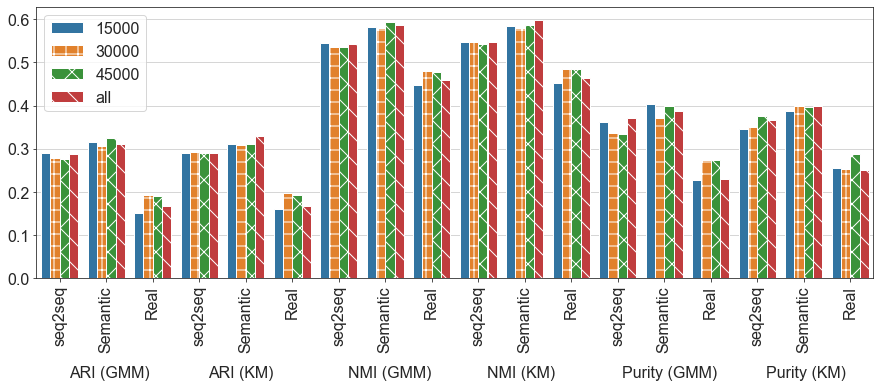

In [265]:
label = column_names * 6
plt.figure(figsize=(15,5))
sns.set_style("ticks", {'axes.grid' : True})

ax = sns.barplot(x='type', y='metric', hue='training', data=df_23)

hatches = [None, '+', 'x', '\\', '*', 'o']
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
plt.xticks(ticks=range(len(label)), labels=label, rotation=90)
plt.legend(loc="best")
#plt.ylim((0, 0.8))
plt.text(0.2, -0.23, 'ARI (GMM)')
plt.text(3.2, -0.23, 'ARI (KM)')
plt.text(6.2, -0.23, 'NMI (GMM)')
plt.text(9.2, -0.23, 'NMI (KM)')
plt.text(12.1, -0.23, 'Purity (GMM)')
plt.text(15.2, -0.23, 'Purity (KM)')
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('../result/plot_training_23.png', format='png', bbox_inches='tight', transparent=True)

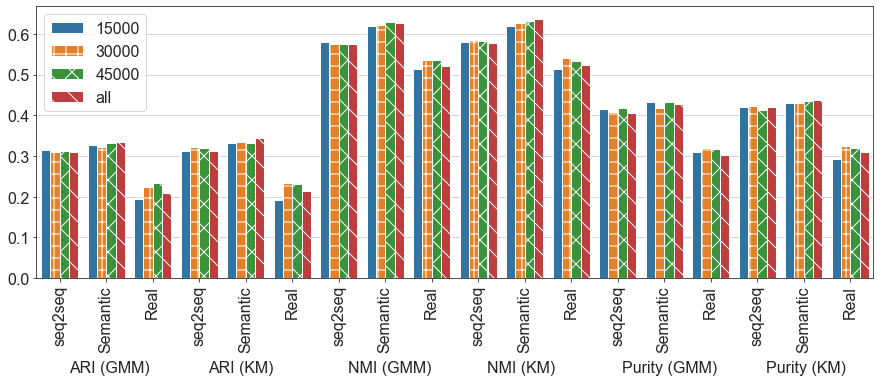

In [266]:
plt.figure(figsize=(15,5))

ax = sns.barplot(x='type', y='metric', hue='training', data=df_34)

hatches = [None, '+', 'x', '\\', '*', 'o']
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
plt.xticks(ticks=range(len(label)), labels=label, rotation=90)
plt.legend(loc="best")
#plt.ylim((0, 0.8))
plt.text(0.2, -0.23, 'ARI (GMM)')
plt.text(3.2, -0.23, 'ARI (KM)')
plt.text(6.2, -0.23, 'NMI (GMM)')
plt.text(9.2, -0.23, 'NMI (KM)')
plt.text(12.1, -0.23, 'Purity (GMM)')
plt.text(15.2, -0.23, 'Purity (KM)')
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('../result/plot_training_34.png', format='png', bbox_inches='tight', transparent=True)